In [1]:
import pandas as pd
import numpy as np
import os 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

plt.style.use('seaborn-whitegrid')
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Set max columns
pd.set_option('display.max_columns', None)

DATADIR = 'data/2020'
OTHERDIR = '/data/misc/'

# Set paths
DATASET = os.path.join(DATADIR, '2020pp.csv')
HIERARCHY = os.path.join(OTHERDIR, 'hierarchy.xlsx')

# **Análisis y ploteo de datos**

In [2]:
df = pd.read_csv(DATASET, index_col=[0])

/home/gerac/.local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (6,7,8,10,11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df

,AUDI,DECL,DPTO,ELE,GVD,INC,INOFFDPTO,INOFFUSI,LOC,MADU,PJI,RETO,TALL,TIPO,UET,ZONA
0,CAPS,2020-01-27 09:00:00.000000,NaN,4120,V2,180,NaN,NaN,NaN,NaN,655200530232,NaN,NaN,NaN,NaN,NaN
1,CAPS,2020-01-27 09:00:00.000000,NaN,4466,V2,1010,NaN,NaN,NaN,NaN,655200420197,NaN,NaN,NaN,NaN,NaN
2,CAPS,2020-01-27 09:00:00.000000,NaN,4420,V2,1110,NaN,NaN,NaN,NaN,655200450172,NaN,NaN,NaN,NaN,NaN
3,CAPS,2020-01-27 09:00:00.000000,NaN,4412,V2,1180,NaN,NaN,NaN,NaN,655200450172,NaN,NaN,NaN,NaN,NaN
4,CAPS,2020-01-27 09:00:00.000000,NaN,4414,V2,1270,NaN,NaN,NaN,NaN,655200420197,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235533,PESD,2020-12-30 09:06:00,PINT,4502,V2,1000,NaN,NaN,GRAL,NaN,655210140012,NaN,SERVP,ASP,DIP,PESD
235534,PESD,2020-12-30 10:03:00,SOLD,7887,V2,3220,NaN,NaN,NaN,NaN,655210140033,NaN,TOLE4,GMTR,659,PESD
235535,PESD,2020-12-30 10:03:00,MONT,5215,V2,4450,NaN,NaN,K74,NaN,655210140033,NaN,CH-ME,NCON,654,PESD
235536,PESD,2020-12-30 10:03:00,PINT,4401,V2,1190,NaN,NaN,H54,NaN,655210140033,NaN,PTAL2,ASP,483,PESD


In [4]:
# Total cars in 2020
df[df.MADU.notna()]["PJI"].nunique()

10780

In [5]:
# Unique defects
(df.ELE.astype(str) + df.INC.astype(str)).nunique()

5156

In [6]:
# Defects per car
len(df) / df["PJI"].nunique()

19.582183614375744

In [7]:
# Set ID for each default
df["ID"] = range(1, len(df) + 1)

# **Pie plots**

<AxesSubplot:ylabel='ID'>

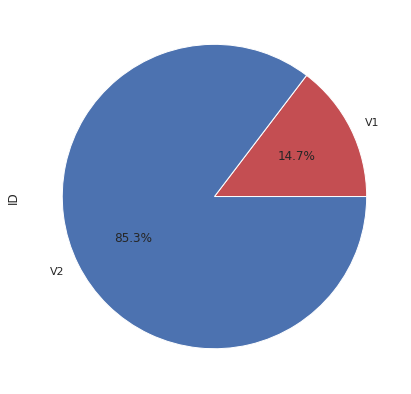

In [8]:
# V1 vs V2
df.groupby("GVD").count()["ID"].plot.pie(
    autopct="%1.1f%%", colors=["r", "b"], figsize=(7, 7)
)

<AxesSubplot:ylabel='ID'>

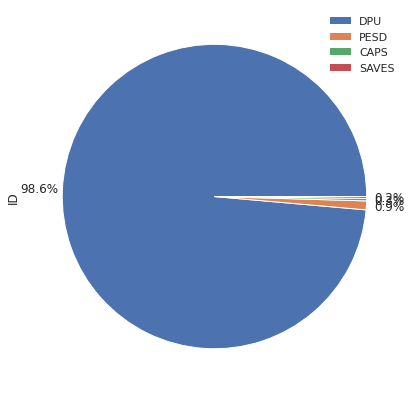

In [9]:
v1 = df[df.GVD == "V1"]
df.groupby("AUDI").count()["ID"].sort_values(ascending=False).plot.pie(
    autopct="%1.1f%%", figsize=(7, 7), legend=True, pctdistance=1.15, labels=None
)

In [10]:
v1

,AUDI,DECL,DPTO,ELE,GVD,INC,INOFFDPTO,INOFFUSI,LOC,MADU,PJI,RETO,TALL,TIPO,UET,ZONA,ID
26,CAPS,2020-07-02 09:00:00.000000,NaN,4202,V1,900,NaN,NaN,NaN,NaN,655200430183,NaN,NaN,NaN,NaN,NaN,27
35,CAPS,2020-12-02 09:00:00.000000,NaN,4301,V1,4260,NaN,NaN,NaN,NaN,655200710059,NaN,NaN,NaN,NaN,NaN,36
69,CAPS,2020-02-26 09:00:00.000000,NaN,4414,V1,1180,NaN,NaN,NaN,NaN,655201020035,NaN,NaN,NaN,NaN,NaN,70
180,CAPS,2020-07-28 09:00:00.000000,NaN,4244,V1,1020,NaN,NaN,NaN,NaN,655203310150,NaN,NaN,NaN,NaN,NaN,181
250,CAPS,2020-01-09 09:00:00.000000,NaN,4161,V1,470,NaN,NaN,NaN,NaN,655203810072,NaN,NaN,NaN,NaN,NaN,251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235357,PESD,2020-10-12 07:21:00,PINT,4852,V1,4690,NaN,NaN,L62,NaN,655205030187,NaN,PTAL2,MOP,484,PESD,229754
235434,PESD,2020-12-16 09:57:00,MONT,5793,V1,2120,NaN,NaN,NaN,NaN,655205030308,NaN,TRIM,MOP,600,PESD,229831
235443,PESD,2020-12-16 08:51:00,MONT,5689,V1,2240,NaN,NaN,NaN,NaN,655205050112,NaN,SMVU,FCIO,SVU,PESD,229840
235500,PESD,2020-12-23 11:22:00,MONT,6731,V1,2590,NaN,NaN,NaN,NaN,655205140213,NaN,TRIM,MOP,642,PESD,229897


<AxesSubplot:ylabel='ID'>

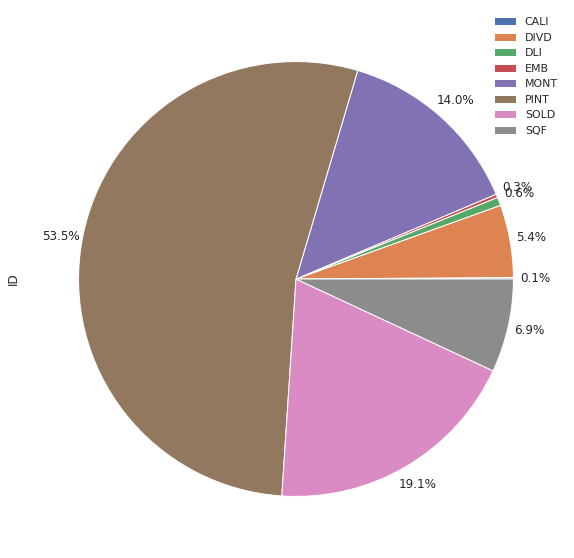

In [11]:
# Defects distribution per dpto
df.groupby("DPTO").count()["ID"].plot.pie(
    autopct="%1.1f%%", figsize=(10, 10), legend=True, pctdistance=1.1, labels=None
)

<AxesSubplot:ylabel='ID'>

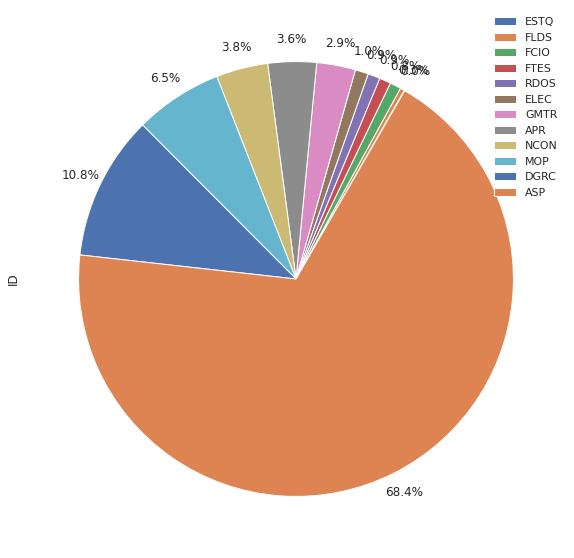

In [12]:
# Defects distribution per type
df.groupby("TIPO").count()["ID"].sort_values().plot.pie(
    autopct="%1.1f%%",
    figsize=(10, 10),
    pctdistance=1.1,
    legend=True,
    labels=None,
    startangle=60,
)

In [13]:
df_temp = df[df.INOFFUSI=='OFF']

In [14]:
df_temp.DECL = pd.to_datetime(df_temp.DECL)
df_temp.set_index(df_temp.DECL, inplace=True)

/home/gerac/.local/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [15]:
def get_resample_df(df, gvd, resample):
    return (
        df[df["GVD"] == gvd]
        .resample(resample)
        .agg({"AUDI": "count"})
        .rename(columns={"AUDI": f"COUNT_{gvd}"})
    )


def get_plot_df(df, resample):
    return pd.concat(
        [get_resample_df(df_temp, "V1", "7D"), get_resample_df(df_temp, "V2", "7D")],
        axis=1,
    )

In [16]:
resample_df = get_plot_df(df, "7D")

In [17]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=resample_df.index, y=resample_df.COUNT_V1, mode="lines+markers", name="V1"
    )
)
fig.add_trace(
    go.Scatter(
        x=resample_df.index, y=resample_df.COUNT_V2, mode="lines+markers", name="V2"
    )
)

# Add dropdown
fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="left",
            buttons=list(
                [
                    dict(
                        args=[{"yaxis.type": "linear"}],
                        label="Normal",
                        method="relayout",
                    ),
                    dict(
                        args=[{"yaxis.type": "log"}], 
                        label="Log",
                        method="relayout"),
                ]
            ),
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.0,
            xanchor="left",
            y=1.15,
            yanchor="top",
        ),
    ]
)

fig.update_layout(
    title="Cantidad de defectos por gravedad en el tiempo",
    xaxis_title="Mes",
    yaxis_title="Cantidad de defectos",
    template="plotly_white",
)

fig.show()
py.plot(fig, filename="Amount of defects by gravity in time", auto_open=True)

NameError: name 'go' is not defined

In [ ]:
width = 15
height = 8
resample="7D"
plt.style.use('bmh')

df_temp[df_temp.GVD == "V1"].resample(resample).count()["AUDI"].plot(
    figsize=(width, height), logy=True
)
df_temp[df_temp.GVD == "V2"].resample(resample).count()["AUDI"].plot(
    figsize=(width, height)
)

In [ ]:
country = px.data.gapminder().query("year == 2007")

In [61]:
country.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
11,Afghanistan,Asia,2007,43.828,31889923,974.580338,AFG,4
23,Albania,Europe,2007,76.423,3600523,5937.029526,ALB,8
35,Algeria,Africa,2007,72.301,33333216,6223.367465,DZA,12
47,Angola,Africa,2007,42.731,12420476,4797.231267,AGO,24
59,Argentina,Americas,2007,75.320,40301927,12779.379640,ARG,32


In [54]:
df_temp

,AUDI,DECL,DPTO,ELE,GVD,INC,INOFFDPTO,INOFFUSI,LOC,MADU,PJI,RETO,TALL,TIPO,UET,ZONA,ID
DECL,,,,,,,,,,,,,,,,,
2020-01-07 13:37:18.999998,DPU,2020-01-07 13:37:18.999998,SOLD,4210,V2,210,IN,OFF,C60,2020-01-21 10:09:23.000003,655194630029,2020-01-08 07:19:39,TOLE4,DGRC,431,CSC1,1055
2020-01-08 07:19:39.000000,DPU,2020-01-08 07:19:39.000000,MONT,4210,V2,1520,OFF,OFF,E61,2020-01-21 10:09:23.000003,655194630029,2020-01-09 13:58:56,DEGVU,DGRC,DEG,BOUT,1056
2020-01-07 13:37:18.999998,DPU,2020-01-07 13:37:18.999998,DIVD,4313,V2,240,OFF,OFF,G63,2020-01-21 10:09:23.000003,655194630029,2020-01-08 07:19:39,INGEN,ASP,300,CSC1,1057
2020-01-07 13:37:18.999998,DPU,2020-01-07 13:37:18.999998,PINT,4320,V2,1240,IN,OFF,V72,2020-01-21 10:09:23.000003,655194630029,2020-01-08 07:19:39,PTAL2,ASP,483,CSC1,1058
2020-01-07 07:28:24.000001,DPU,2020-01-07 07:28:24.000001,SOLD,4340,V2,3190,IN,OFF,,2020-01-21 10:09:23.000003,655194630029,2020-01-08 07:19:39,TOLE4,MOP,432,TRI1,1059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-30 12:31:43.999997,DPU,2020-12-30 12:31:43.999997,PINT,4505,V2,1400,OFF,OFF,V73,2020-12-30 14:19:55.000004,655210220024,2020-12-30 14:10:35.999996,PTAL2,ASP,484,CSC1,227759
2020-12-30 12:18:48.999997,DPU,2020-12-30 12:18:48.999997,MONT,4210,V2,8440,OFF,OFF,E62,2020-12-30 12:44:29,655210220031,2020-12-30 12:37:46.999997,SMVU,RDOS,DVU,STRA,227768
2020-12-30 11:40:13.000002,DPU,2020-12-30 11:40:13.000002,PINT,4214,V2,1180,OFF,OFF,AA54,2020-12-30 12:44:29,655210220031,2020-12-30 12:37:46.999997,PTAL2,ASP,486,CSC1,227769


In [93]:
dpto_tipo_by_v1 = (
    df_temp[df_temp["GVD"] == "V1"]
    .groupby(["DPTO", "TIPO"])
    .agg({"TIPO": "count"})
    .rename(columns={"TIPO": "COUNT_V1"})
)

In [94]:
dpto_tipo_by_v2 = (
    df_temp[df_temp["GVD"] == "V2"]
    .groupby(["DPTO", "TIPO"])
    .agg({"TIPO": "count"})
    .rename(columns={"TIPO": "COUNT_V2"})
)

In [140]:
dpto_tipo_total = df_temp.groupby(["DPTO", "TIPO","GVD"]).agg({"TIPO": "count"}).rename(columns={"TIPO": "TOTAL"})
dtp_tipo_v1_v2 = pd.DataFrame(dpto_tipo_by_v1.COUNT_V1/dpto_tipo_by_v2.COUNT_V2).rename(columns={0:'V1_V2'})

In [143]:
dpto_tipo_total

TOTAL
DPTO TIPO GVD       
CALI ASP  V1       5
          V2      96
     DGRC V1       3
          V2       7
     ELEC V1       6
...              ...
SQF  MOP  V2     942
     NCON V1     244
          V2    1571
     RDOS V1     326
          V2     171

[144 rows x 1 columns]

In [141]:
sunburst_df = pd.concat([dpto_tipo_total,dtp_tipo_v1_v2],axis=1).reset_index()

ValueError: Length of names must match number of levels in MultiIndex.

In [116]:
pd.concat([df_temp.groupby(["DPTO", "TIPO"]).agg({"TIPO": "count"}).rename(columns={"TIPO": "COUNT_V2"}), 
           d.DataFrame(dpto_tipo_by_v1.COUNT_V1/dpto_tipo_by_v2.COUNT_V2).rename(columns={0:'V1_V2'})], axis=1]

SyntaxError: closing parenthesis ']' does not match opening parenthesis '(' on line 1 (1652842945.py, line 2)

In [80]:
df_count_v2 = (
    df_temp[df_temp.GVD=="V1"].groupby(["DPTO", "TIPO"])
    .agg({"TIPO": "count"})
    .rename(columns={"TIPO": "COUNT"})
    #.reset_index()
)

In [147]:
dpto_tipo_total = dpto_tipo_total.reset_index()

In [151]:
!pip install chart_studio

Defaulting to user installation because normal site-packages is not writeable
  Using cached chart_studio-1.1.0-py3-none-any.whl (64 kB)
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.


In [153]:
import chart_studio
chart_studio.tools.set_credentials_file(username='Gex009', api_key='iMvwCuBlWsdNN1oEKFxl')

In [326]:
import chart_studio.plotly as py
import plotly.graph_objects as go

trace0 = go.Scatter(x=[1, 2, 3, 4], y=[10, 15, 13, 17])
trace1 = go.Scatter(x=[1, 2, 3, 4], y=[16, 5, 11, 9])
data = [trace0, trace1]

py.plot(data, filename="AUCROC", auto_open=True)

'https://plotly.com/~Gex009/4/'

In [205]:
import plotly.express as px
import numpy as np
import plotly.io as pio

# df = px.data.gapminder().query("year == 2007")
df_temp

# fig = px.sunburst(sunburst_df, path=['DPTO', 'TIPO'], values='TOTAL')#, color=['V1_V2'])
#                   color='lifeExp', hover_data=['iso_alpha'],
#                   color_continuous_scale='RdBu',
#                   color_continuous_midpoint=np.average(df['lifeExp'], weights=df['pop']))
fig = px.sunburst(
    dpto_tipo_total,
    path=["DPTO", "TIPO","GVD"],
    values="TOTAL",
    color="DPTO",
    width=700, 
    height=700,
    template="seaborn",
    title="<b>Sunburst plot by departure, type defect and gravity</b>"
    #hover_data=["iso_alpha"],
    #color_continuous_scale="RdBu",
    #color_continuous_midpoint=np.average(sunburst_df["V1_V2"], weights=sunburst_df["TOTAL"]),
)

fig.update_layout(
    font_family="Open Sans",
    font_color="black",
    title_font_family="Open Sans",
)

fig.show()

py.plot(fig, filename="Sunburst_DPTO_TIPO_GVD", auto_open=True)
#py.iplot(data, filename = 'basic-line')
#pio.write_html(fig, file='hello_world.html', auto_open=True)

'https://plotly.com/~Gex009/10/'

<AxesSubplot:ylabel='ID'>

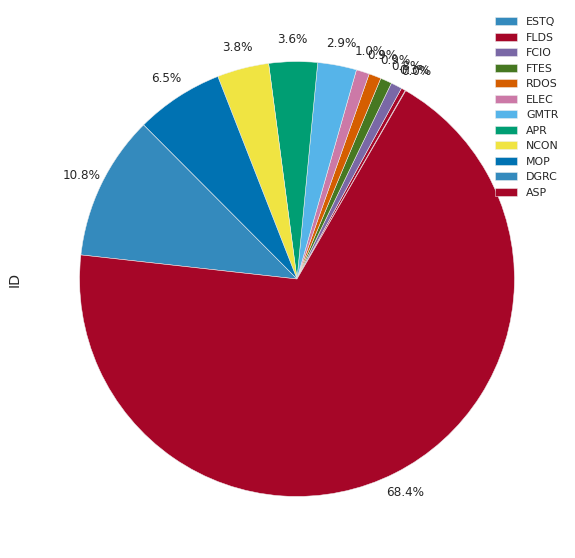

In [41]:
df.groupby("TIPO").count()["ID"].sort_values().plot.pie(
    autopct="%1.1f%%",
    figsize=(10, 10),
    pctdistance=1.1,
    legend=True,
    labels=None,
    startangle=60,
)

# **Mapas de calor**

## Cantidad de defectos DPTO vs TIPO

In [37]:
plot_df = pd.crosstab([df.DPTO], [df.TIPO])
plot_df = plot_df.mask(plot_df < 21, 0)

In [39]:
mask_df = plot_df.mask(plot_df > 21, 1)

In [72]:
mask_df = mask_df.replace({0:False, 1:True})

Text(0.5, 1.0, 'DPTO vs TIPO por defectos')

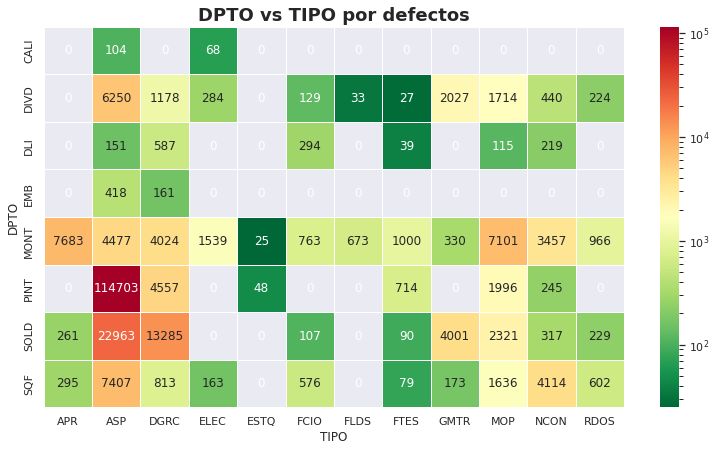

In [32]:
from matplotlib.colors import LogNorm

plt.figure(figsize=(13, 7))

#plot_df = df[df]

fig = sns.heatmap(
    plot_df,
    norm=LogNorm(),
    annot=True,
    cmap="RdYlGn_r",
    fmt="d",
    linewidths=0.5,
)
fig.set_title(
    "DPTO vs TIPO por defectos",
    fontdict={
        "weight": "bold",
        "size": 18,
    },
)

In [74]:
v1 = df[df.GVD=='V1']
v2 = df[df.GVD=='V2']

In [75]:
v1cross = pd.crosstab([v1.DPTO], [v1.TIPO])
v2cross = pd.crosstab([v2.DPTO], [v2.TIPO])

In [46]:
# mindef = 30
# v2cross = v2cross[v2cross>mindef]
# v1cross = v1cross[v2cross>mindef]

In [76]:
v1v2pct = v1cross / (v1cross + v2cross)

In [79]:
v1v2pct = pd.crosstab([v1.DPTO], [v1.TIPO])/(pd.crosstab([v1.DPTO], [v1.TIPO])+pd.crosstab([v2.DPTO], [v2.TIPO]))
v1v2pct = v1v2pct[mask_df].fillna(0)

## Porcentaje de V1s por cantidad de defectos

Text(0.5, 1.0, 'DPTO vs TIPO por % de V1/V2')

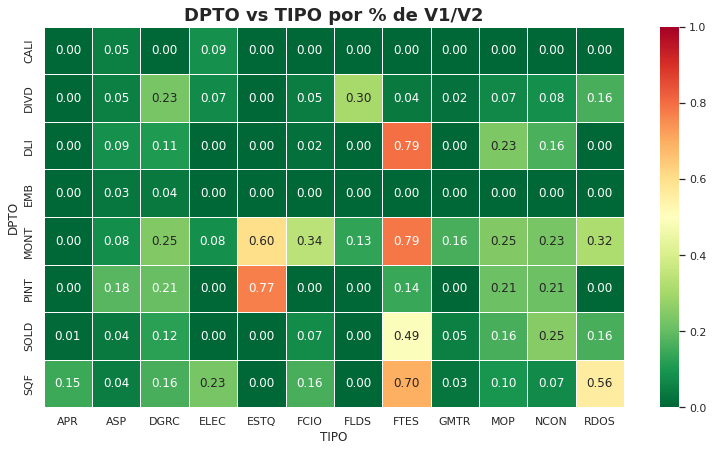

In [80]:
plt.figure(figsize=(13, 7))

fig = sns.heatmap(
    v1v2pct,
    annot=True,
    cmap="RdYlGn_r",
    fmt=".2f",
    linewidths=0.5,
    vmin=0,
    vmax=1,
    robust=True,
)

fig.set_title(
    "DPTO vs TIPO por % de V1/V2",
    fontdict={
        "weight": "bold",
        "size": 18,
    },
)

<AxesSubplot:xlabel='TIPO', ylabel='DPTO-TALL-UET'>

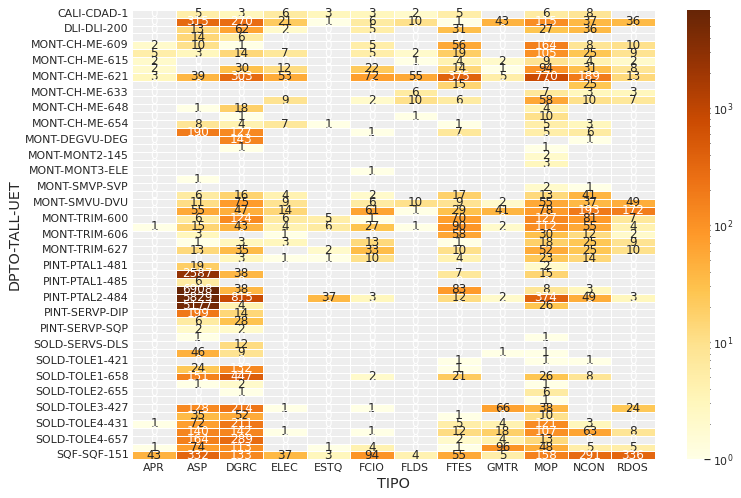

In [225]:
sns.heatmap(
    pd.crosstab([v1.DPTO, v1.TALL, v1.UET], [v1.TIPO]),
    norm=LogNorm(),
    annot=True,
    cmap="YlOrBr",
    fmt="d",
    linewidths=0.5,
)

In [226]:
(len(df.PJI.unique())*3000000)/160

220162500.0

<AxesSubplot:title={'center':'Valores faltantes en cada columna del dataset'}>

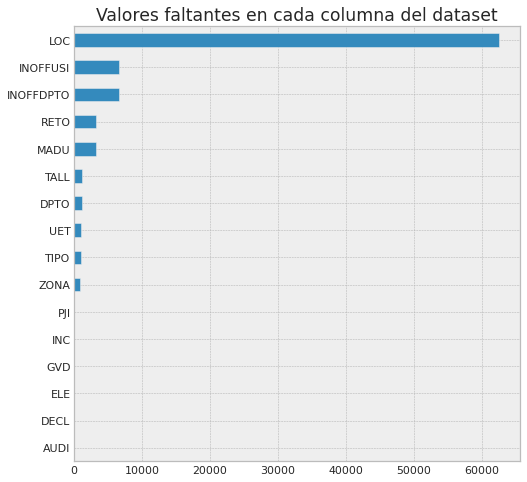

In [348]:
df.isna().sum().sort_values().plot(
    kind="barh", 
    title="Valores faltantes en cada columna del dataset", 
    figsize=(8,8)
)

<AxesSubplot:title={'center':'Valores faltantes en columnas relevantes del dataset'}>

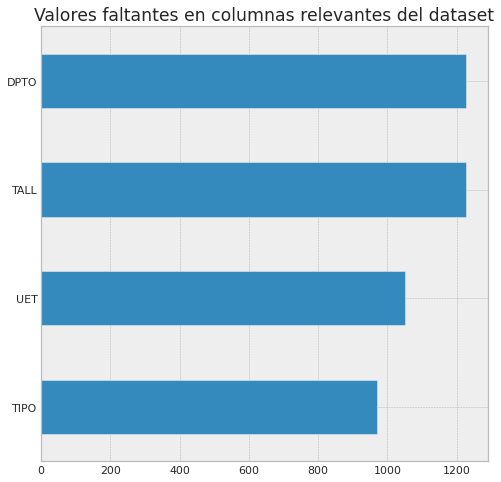

In [351]:
df[['TALL','DPTO','UET','TIPO']].isna().sum().sort_values().plot(
    kind="barh", 
    title="Valores faltantes en columnas relevantes del dataset", 
    figsize=(8,8)
)

<AxesSubplot:>

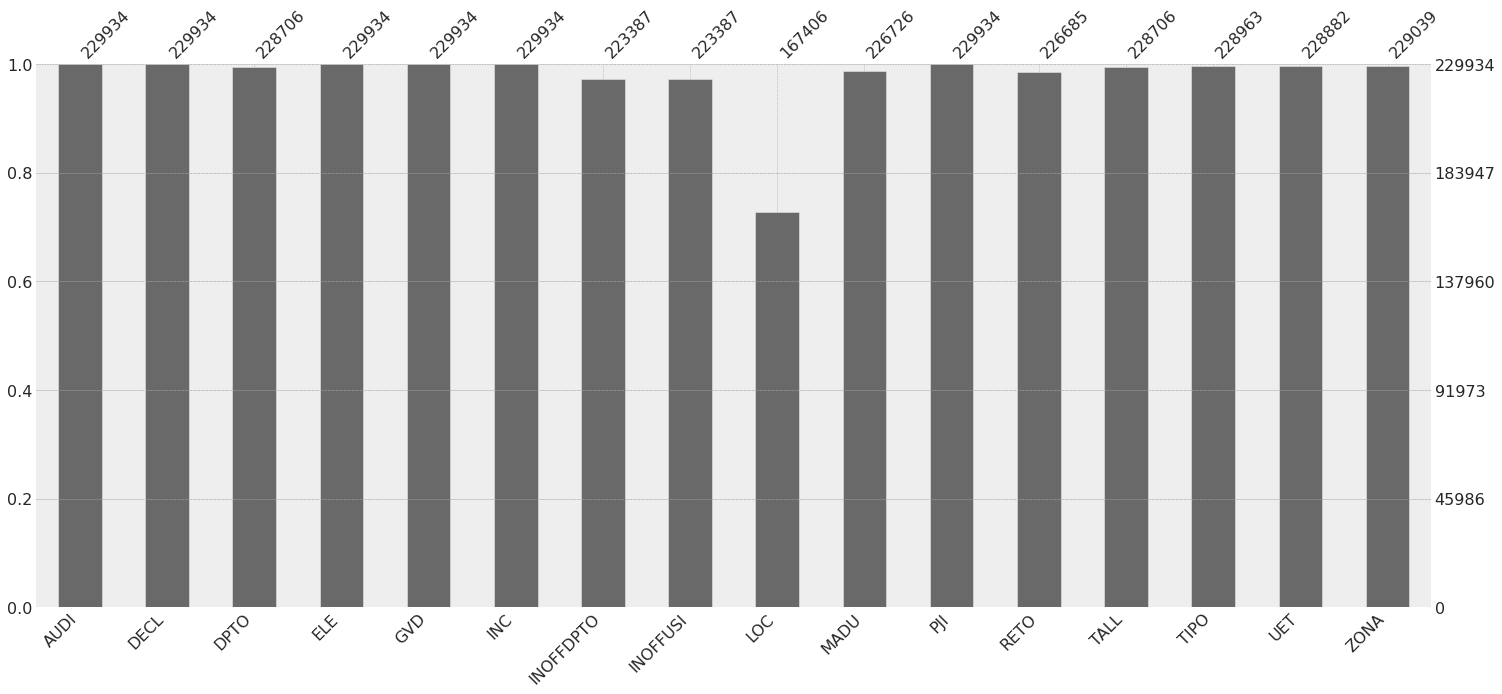

In [338]:
import missingno as msno
msno.bar(df)

In [70]:
# Set date as datetimeindex
df['DECL'] = pd.to_datetime(df['DECL'])
df[df['DECL']>='2020-01-01']
df.set_index('DECL', inplace=True)

In [49]:
colorsdpto = {'CALI':'white', 'MONT':'goldenrod', 'SOLD':'skyblue', 'PINT':'limegreen', 'SQF':'orange', 'DLI':'lightblue', 'DIVD':'black'}

In [53]:
colors = list(colorsdpto.values())

In [71]:
df['TIMERETO'] = (pd.to_datetime(df['RETO']) - df.index).dt.total_seconds()/3600

In [72]:
df['TIMERETOLOG'] = np.log((pd.to_datetime(df['RETO']) - df.index).dt.total_seconds())/3600

/home/gerac/.local/lib/python3.9/site-packages/pandas/core/arraylike.py:274: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/gerac/.local/lib/python3.9/site-packages/pandas/core/arraylike.py:274: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:>

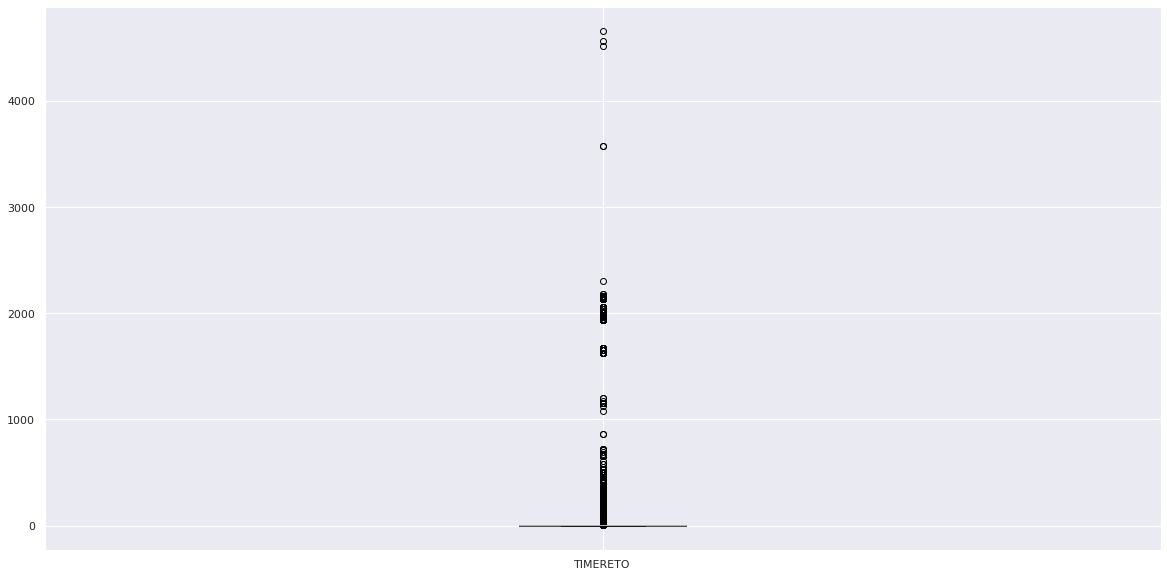

In [73]:
df[df.TIMERETO>0].boxplot(column=['TIMERETO'], figsize=(20,10))

In [13]:


def normalize(df, col: str):
    return df[np.abs(stats.zscore(df[col]))<3]

In [36]:
dftimereto = df[df.TIMERETO>0]

In [37]:
len(dftimereto)

192754

In [38]:
# Normalize via z-score
dftimereto = dftimereto[np.abs(stats.zscore(dftimereto.TIMERETO))<3]

<AxesSubplot:title={'center':'TIMERETO'}, xlabel='DPTO'>

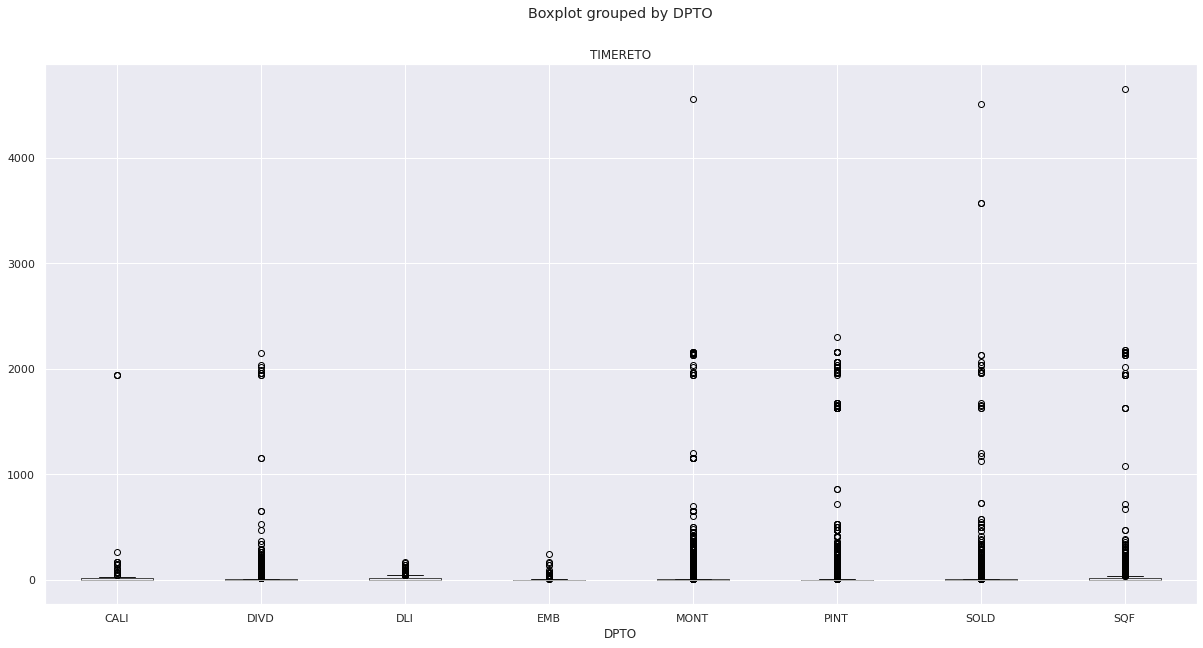

In [39]:
df[df.TIMERETO>0].boxplot(column=['TIMERETO'], by='DPTO', figsize=(20,10))

<AxesSubplot:title={'center':'TIMERETO'}, xlabel='DPTO'>

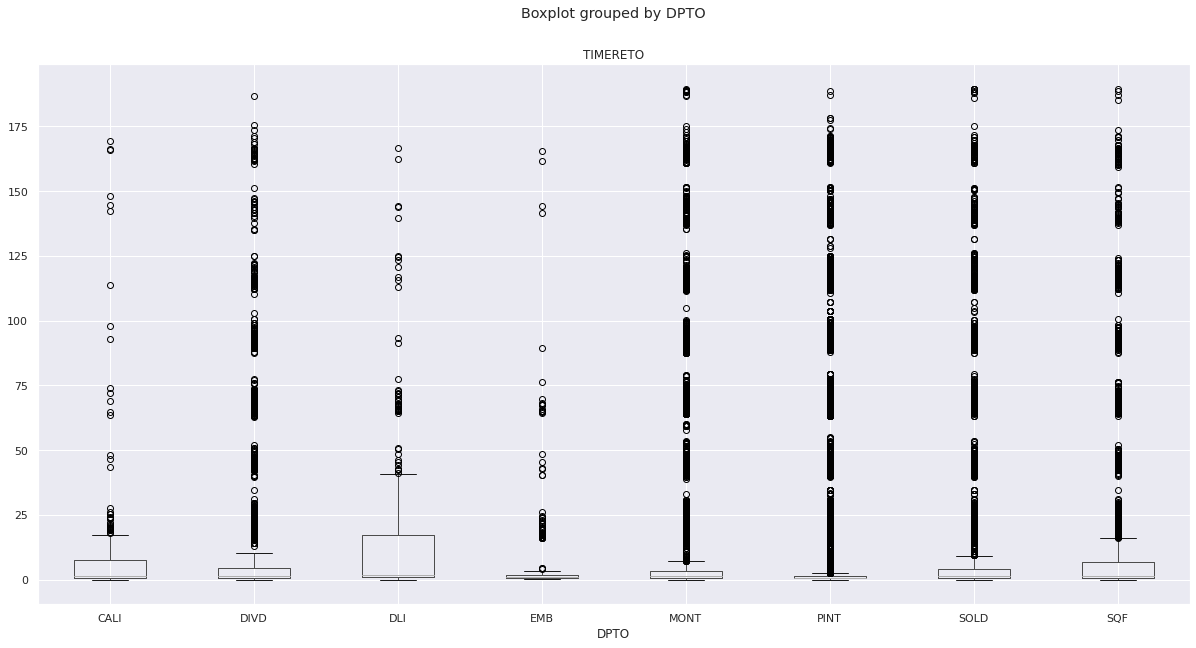

In [40]:
dftimereto[dftimereto.TIMERETO>0].boxplot(column=['TIMERETO'], by='DPTO', figsize=(20,10))

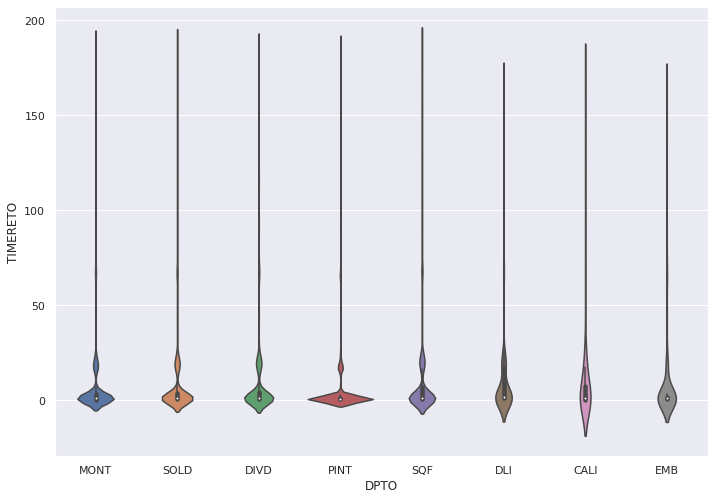

In [42]:
#df_temp = dftimereto[df['TIMERETO']>0]
ax = sns.violinplot(x="DPTO", y="TIMERETO", data=dftimereto)#, palette=colors)

<AxesSubplot:xlabel='DPTO'>

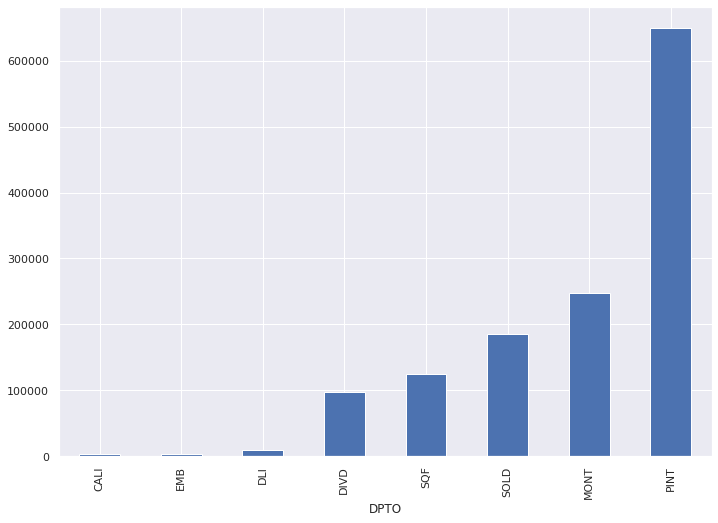

In [43]:
dftimereto.groupby('DPTO').sum()['TIMERETO'].sort_values().plot(kind='bar')

<AxesSubplot:xlabel='TIPO'>

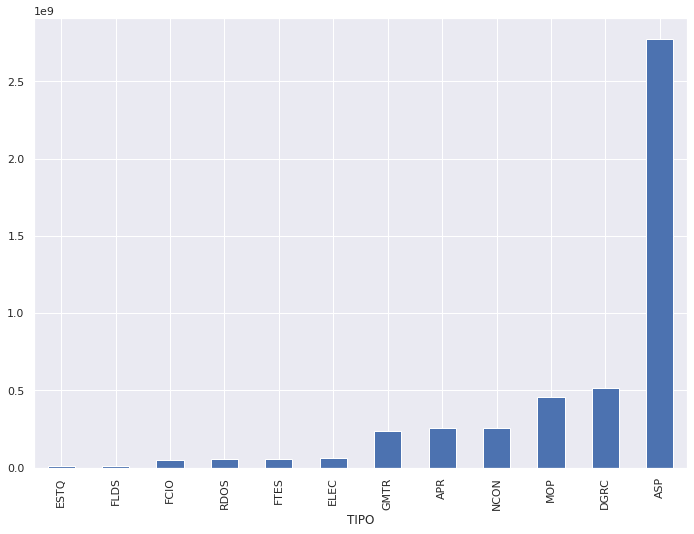

In [32]:
dftimereto.groupby('TIPO').sum()['TIMERETO'].sort_values().plot(kind='bar')

# **Time plotting**

In [148]:
df = df[(df.index>='2020-01-01')]

In [153]:
freq = 'D'
v1 = df[df['GVD']=='V1'].resample(freq).count()['ID'].to_frame().rename(columns={'ID':'V1'})
v2 = df[df['GVD']=='V2'].resample(freq).count()['ID'].to_frame().rename(columns={'ID':'V2'})

In [154]:
v2 = v2[v2.index>'2020-01-01']
total = v2.join(v1)

In [155]:
import datetime

covid_quarantine_start = datetime.datetime.strptime('2020-03-19', '%Y-%m-%d')
covid_quarantine_texttime = datetime.datetime.strptime('2020-03-22', '%Y-%m-%d')

def get_timeplot(mydate: str):
    return datetime.datetime.strptime(mydate, '%Y-%m-%d')

# Defectos agrupados por medida de tiempo

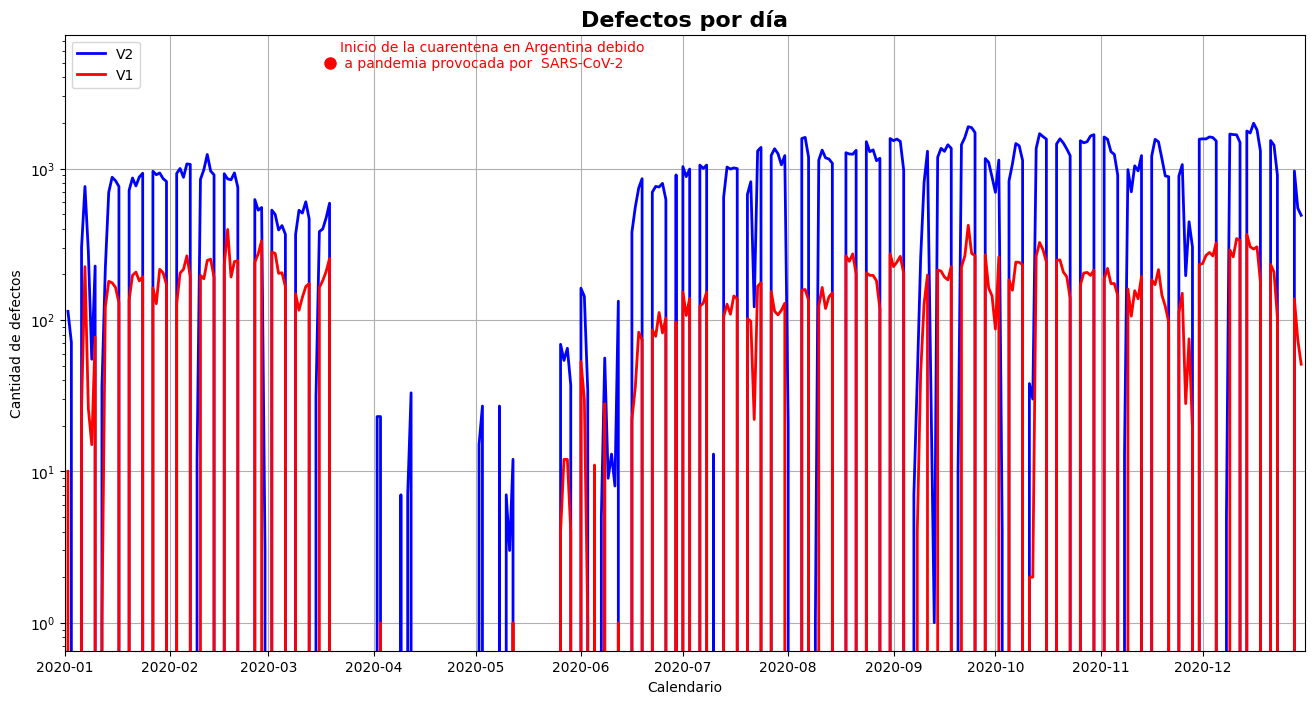

In [156]:
# Set size
fig = plt.figure(figsize=(16,8))

# Get axes
ax = plt.gca()

# Set title
ax.set_title('Defectos por día', fontsize=16, fontweight='bold')

# Set labels
ax.set_xlabel('Calendario')
ax.set_ylabel('Cantidad de defectos')

#ax.text(3, 4, 'Random Noise', bbox={'facecolor': 'grey', 'alpha': 0.5, 'pad': 10})
#ax.text(date_time_obj, 4.1, 'No continuous trend observed', color='red')

ax.plot(get_timeplot('2020-03-19'), 5000, marker='o', c='red', markersize=8)
ax.text(covid_quarantine_texttime, 4660, 'Inicio de la cuarentena en Argentina debido \n a pandemia provocada por  SARS-CoV-2', color='red')

# Plot
ax.semilogy(total.index.to_pydatetime(), total.V2, c='blue', linewidth=2, label='V2')
ax.semilogy(total.index.to_pydatetime(), total.V1, c='red', linewidth=2, label='V1')
#ax.semilogy(total.index.to_pydatetime(), smooth(total.V2, 2), c='green', linewidth=2, label='salgov')

plt.xlim([get_timeplot('2020-01-01'), get_timeplot('2020-12-31')])
plt.grid()
plt.legend(loc="upper left")
# Show
#ax.plot()
#ax.set_yscale('log')
#plt.scatter(total.index.to_pydatetime(), total.V2)
#plt.scatter(total.index.to_pydatetime(), total.V1)
#plt.plot(total.index.to_pydatetime(), total.V1, logy=True)

<AxesSubplot:xlabel='DECL'>

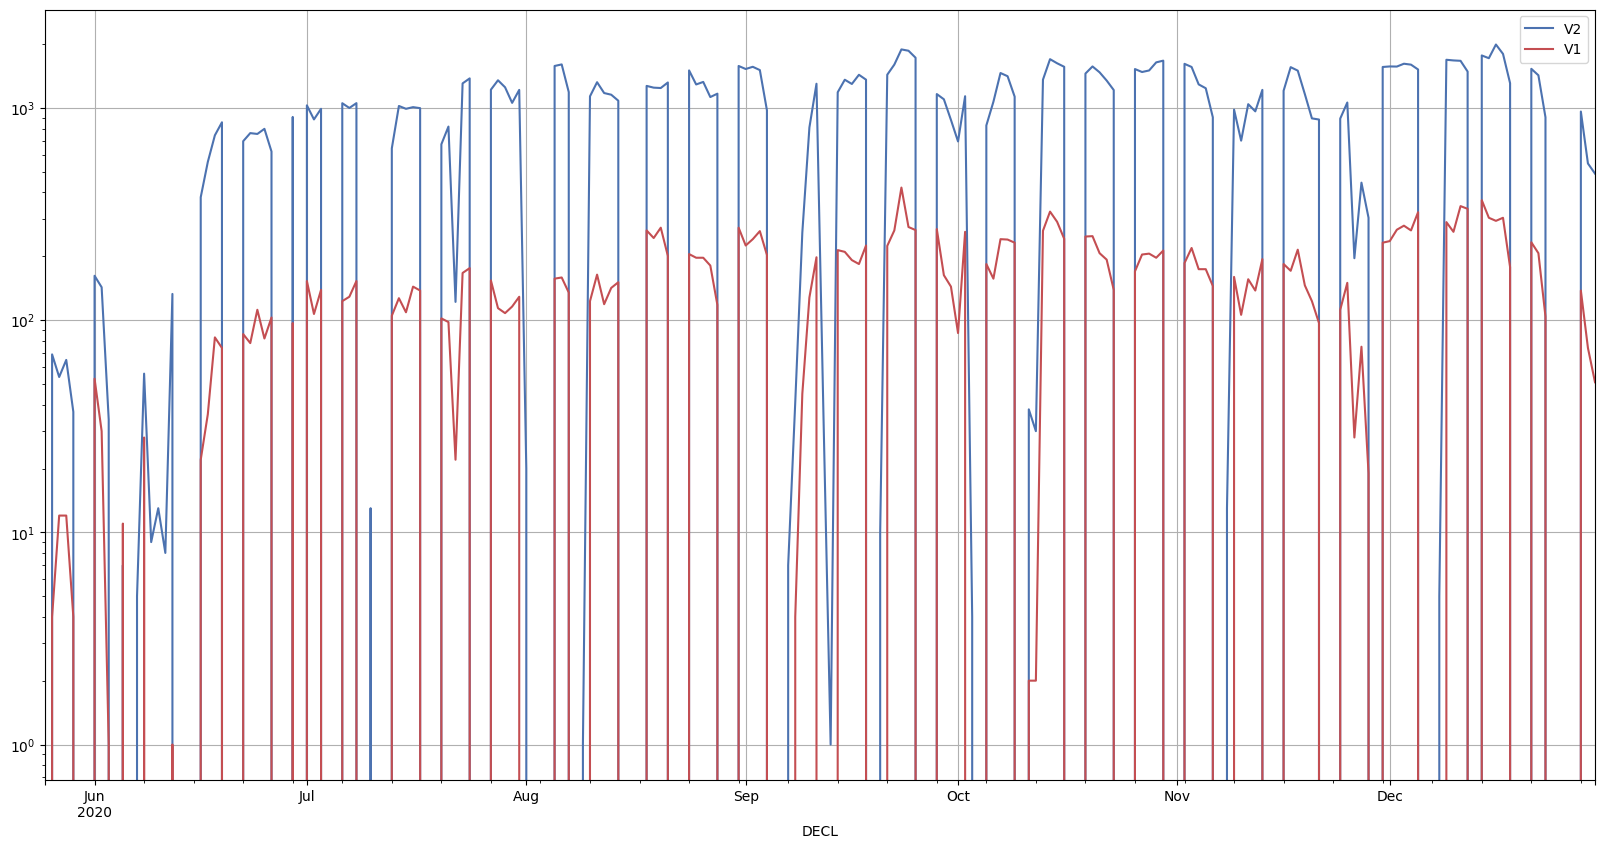

In [105]:
total['2020-05-25':'2021-01-01'].plot(logy=True, figsize=(20,10), grid=True, color=['b','r'])

In [75]:
# Group by week, gravity and audit
test = df.groupby([df.index.isocalendar().week, df['GVD'], df['AUDI']]).count()
audi_gvt = test['ID'].unstack(level=-1).unstack(level=-1).fillna(0)

In [76]:
# Group by week, gravity and type
test = df.groupby([df.index.date, df['GVD'], df['TIPO']]).count()
audi_tipo = test['ID'].unstack(level=-1).unstack(level=-1).fillna(0)

In [79]:
audi_gvt.astype(int)

AUDI CAPS       DPU       PESD      SAVES    
GVD    V1  V2    V1    V2   V1   V2    V1  V2
week                                         
1       0   0    10   185    0    0     0   0
2       2  13   368  1585    0   65     0   0
3       0   0   770  3300    2   86     0   0
4       0   0   911  4083    3   78     0   0
5       0  18   880  4381    3   78     0   7
6       0   6  1005  4903    1   31     0  14
7       0  33  1071  4843    2   51     1  15
8       0  22  1303  4204    3   59     1  24
9       1  13   846  1631    0   58     0   9
10      0   9  1129  2151    1   28     0  21
11      1  25   744  2395    0   65     1  19
12      0  13   810  1787    0   30     0  15
14      0   8     0     0    1   38     0   0
15      0  21     0     0    0   26     0   0
18      0   6     0     0    0   36     0   0
19      0  15     0     0    0   19     0   0
20      0   3     0     0    1   12     0   0
22      0   0    32   225    0    0     0   0
23      0   8    95   308    0   35     0   0
24      0  22    29   185    0   12     0   0
25      0   0   215  2523    0   15     0   0
26      0   0   461  3607    0   30     0   0
27      1   1   494  3735    1   78     0   0
28      0  22   405  3082    0   19     0   0
29      0  20   623  4640    0   10     0   0
30      0   9   565  4263    0   15     0  15
31      1  11   619  6014    1   73     0  24
32      0   5   451  4346    0   10     0  14
33      0   7   698  5855    0    0     1  14
34      0  10   982  5019    1   41     0  13
35      0  14   898  6373    0   22     0  12
36      0  10  1204  7121    0   11     1  16
37      0  14   373  2399    1   39     1   2
38      2  23  1021  6536    2   74     0  19
39      0  25  1449  8398    2   74     1  22
40      0  31   924  4880    0   54     0  15
41      0   3  1054  5898    2   44     0   0
42      0  20  1122  6234    2   28     0   0
43      0  10  1036  7053    0    0     0   0
44      3  38   987  7757    0   30     0   0
45      0   3   898  6581    0   45     0   0
46      0  16   749  4817    5   78     0   0
47      0  17   935  7004    1  187     0   0
48      1   8   383  2811    0   80     0   0
49      1  12  1600  9314    1   73     0  43
50      0   9  1230  6458    0   32     1  28
51      1  11  1443  8475    2   68     2  37
52      0   4   541  3789    2   46     1  24
53      0   1   263  1952    0   33     0  16

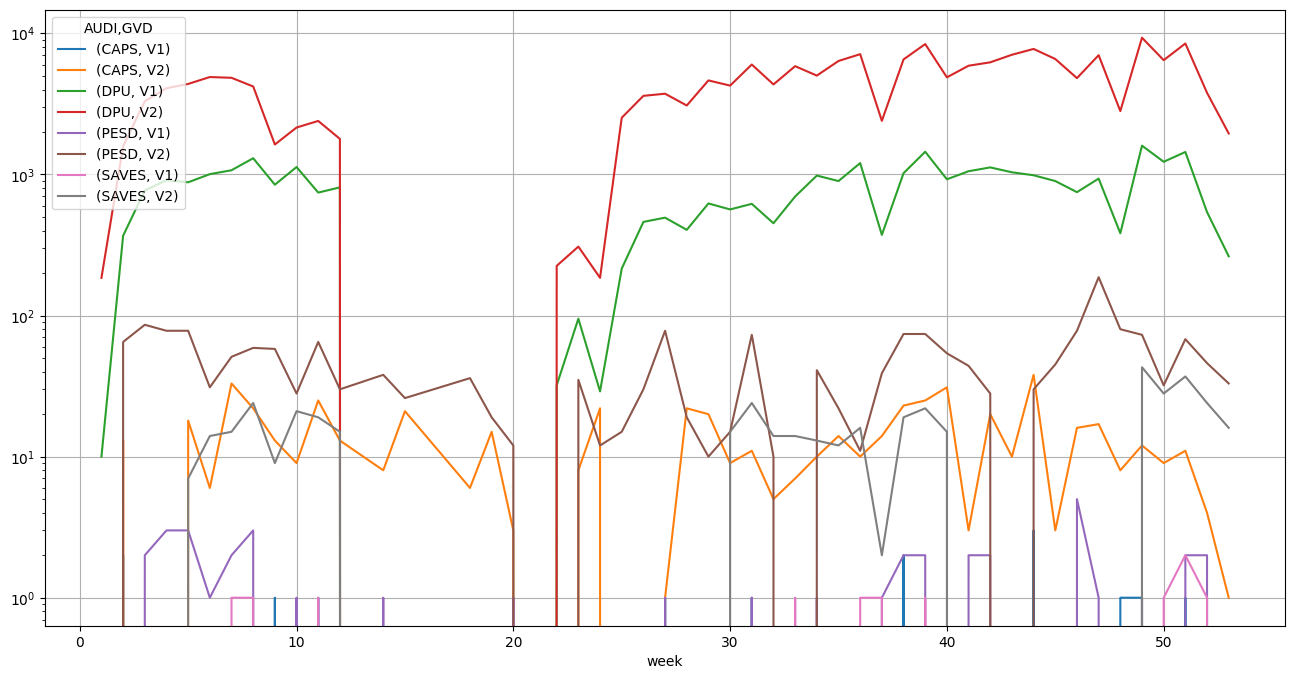

In [160]:
plt.style.use('default')
ax = audi_gvt.plot(logy=True, figsize=(16,8), grid=True)
fig = ax.get_figure()
fig.savefig("output.png")

In [77]:
test = df.groupby([df.index.hour, df['DPTO']]).count()
dftoxhs = test['ID'].unstack(level=-1).fillna(0)

In [78]:
dftoxhs = dftoxhs.astype(int)

<AxesSubplot:xlabel='DPTO', ylabel='DECL'>

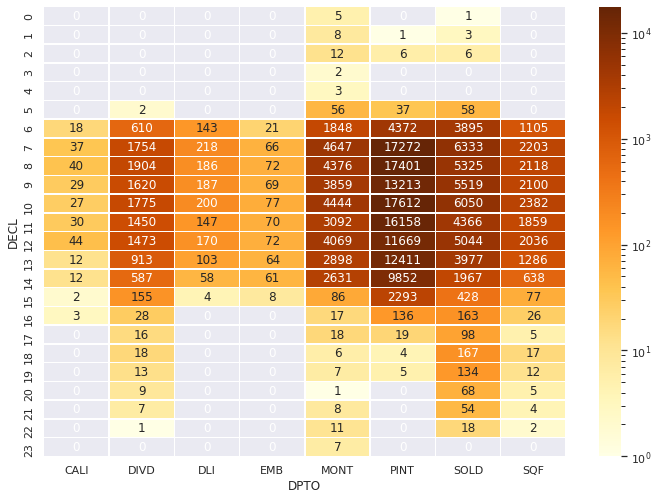

In [89]:
sns.heatmap(dftoxhs, norm=LogNorm(), annot=True, cmap='YlOrBr', linewidths=.5, fmt='d')

In [382]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']
